In [2]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ['/public/home/mowp/test/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
%load_ext autoreload
%autoreload 1

import sys
sys.path.append('/public1/mowp/workspace/mowp_scripts/tools/analysis')
%aimport plot

In [4]:
import numpy as np
import pandas as pd
import pyBigWig
from loguru import logger

In [5]:
cen_region = {}
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/cen_region.bed'
with open(infile, 'r') as f:
    for line in f:
        line = line.strip().split("\t")
        cen_region[line[0]] = (int(line[1]), int(line[2]))

In [6]:
def get_map_ratio(infile, chrom, start, end, min_depth: int = 1):
    bwfile = pyBigWig.open(infile)

    if type(chrom) != list:
        chrom = [chrom]
        start = [start]
        end = [end]
    if len(chrom) != len(start) or len(chrom) != len(end) or len(start) != len(end):
        raise ValueError('the size must equal')

    total_len, no_coverage_base = 0, 0
    for _chrom, _start, _end in zip(chrom, start, end):
        values = bwfile.values(_chrom, _start, _end)
        values = np.nan_to_num(values)
        no_coverage_base += len(values[values < min_depth])
        total_len += _end - _start

    bwfile.close()

    logger.info(f'coverage = {1-no_coverage_base/total_len}, total_len = {total_len}, no_coverage_base = {no_coverage_base}')

    return 1-no_coverage_base/total_len

In [30]:
bigwig = {
    'wt-1029': '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/aligned_data/20221029_col_m6A.sorted.q2.bw',
    'wgbs-1': '/data/Zhaijx/mowp/data/public_data/col_CEN_reference/wgbs_pe/bismark_aligned_data/bw_covearge/Col-0_rep1_ERR965674.cov.bw',
    'atac-2': '/data/Zhaijx/mowp/data/public_data/col_CEN_reference/atac_seq_pe/bw_cov/col_r1_ATACseq_GSM4705404.sorted.rmdup.bw',
}

# All centromeres

In [31]:
# use to save the results
nanopore_data, nanopore_readuntil_data, wgbs_data, atacseq_data = [], [], [], []

In [32]:
chrom, start, end = [], [], []
for _chrom, coordinate in cen_region.items():
    chrom.append(_chrom)
    start.append(coordinate[0])
    end.append(coordinate[1])

In [33]:
infile = bigwig['wt-1029']

nanopore_readuntil = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:20.360 | INFO     | __main__:get_map_ratio:20 - coverage = 0.9999970678172657, total_len = 12618586, no_coverage_base = 37


In [34]:
infile = bigwig['wgbs-1']

wgbs = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:24.446 | INFO     | __main__:get_map_ratio:20 - coverage = 0.8456856417985343, total_len = 12618586, no_coverage_base = 1947229


In [35]:
infile = bigwig['atac-2']
atacseq = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:28.430 | INFO     | __main__:get_map_ratio:20 - coverage = 0.24922079225041538, total_len = 12618586, no_coverage_base = 9473772


In [36]:
nanopore_readuntil_data.append(nanopore_readuntil)
wgbs_data.append(wgbs)
atacseq_data.append(atacseq)

# Telomeres

In [37]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/tel_region.bed'
telomere_regions = {}
with open(infile) as f:
    for line in f:
        line = line.strip().split('\t')
        telomere_regions[line[3]] = (line[0], int(line[1]), int(line[2]))

In [38]:
chrom, start, end = [], [], []
for region in telomere_regions:
    chrom.append(region[0])
    start.append(region[1])
    end.append(region[2])

In [39]:
infile = bigwig['wt-1029']
nanopore_readuntil = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:28.843 | INFO     | __main__:get_map_ratio:20 - coverage = 1.0, total_len = 26992, no_coverage_base = 0


In [40]:
infile = bigwig['wgbs-1']
wgbs = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:28.948 | INFO     | __main__:get_map_ratio:20 - coverage = 0.314278304682869, total_len = 26992, no_coverage_base = 18509


In [41]:
infile = bigwig['atac-2']
atacseq = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:29.045 | INFO     | __main__:get_map_ratio:20 - coverage = 0.16701244813278004, total_len = 26992, no_coverage_base = 22484


In [42]:
nanopore_readuntil_data.append(nanopore_readuntil)
wgbs_data.append(wgbs)
atacseq_data.append(atacseq)

# 45s rDNA

In [43]:
r45s_regions = [
    ['Chr2', 20000, 119865],
    ['Chr4', 4500, 92117]
]

In [44]:
chrom, start, end = [], [], []
for region in r45s_regions:
    chrom.append(region[0])
    start.append(region[1])
    end.append(region[2])

In [45]:
infile = bigwig['wt-1029']
nanopore_readuntil = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:29.751 | INFO     | __main__:get_map_ratio:20 - coverage = 0.9997119723493455, total_len = 187482, no_coverage_base = 54


In [46]:
infile = bigwig['wgbs-1']
wgbs = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:29.918 | INFO     | __main__:get_map_ratio:20 - coverage = 0.37710286854204667, total_len = 187482, no_coverage_base = 116782


In [47]:
infile = bigwig['atac-2']
atacseq = get_map_ratio(infile, chrom, start, end)

2022-11-21 10:57:30.044 | INFO     | __main__:get_map_ratio:20 - coverage = 0.13957606596899974, total_len = 187482, no_coverage_base = 161314


In [48]:
nanopore_readuntil_data.append(nanopore_readuntil)
wgbs_data.append(wgbs)
atacseq_data.append(atacseq)

# Summary

In [50]:
def change_width(ax, new_value):
    locs = ax.get_xticks()
    for i,patch in enumerate(ax.patches):
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(locs[i//4] - (new_value * .5))

In [51]:
import re

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = re.findall(r'\d{1,}?\.\d{1,}' ,str(p.get_height()))[0][:4]
                ax.text(_x, _y, value, ha="center", fontsize=10) 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = re.findall(r'\d{1,}?\.\d{1,}' ,str(p.get_height()))[0][:4]
                ax.text(_x, _y, value, ha="left", fontsize=10)

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [52]:
regions = ['Centromeres', 'Telomeres', '45 rDNA', 'Genes']
data_type = ['STAM-seq', 'WBGS', 'ATAC-seq']
data = []
for _data, _data_type in zip([nanopore_data, wgbs_data, atacseq_data], data_type):
    for a, b in zip(_data, regions):
        data.append([a, b, _data_type])


In [58]:
regions = ['Centromeres', 'Telomeres', '45S rDNAs']
data_type = ['STAM-seq', 'WGBS', 'ATAC-seq']
data = []
for _data, _data_type in zip([nanopore_readuntil_data, wgbs_data, atacseq_data], data_type):
    for a, b in zip(_data, regions):
        data.append([a, b, _data_type])


In [59]:
df = pd.DataFrame(data, columns=['ratio', 'region', 'data_type'])

In [60]:
df

,ratio,region,data_type
0,0.999997,Centromeres,STAM-seq
1,1.000000,Telomeres,STAM-seq
2,0.999712,45S rDNAs,STAM-seq
3,0.845686,Centromeres,WGBS
4,0.314278,Telomeres,WGBS
5,0.377103,45S rDNAs,WGBS
6,0.249221,Centromeres,ATAC-seq
7,0.167012,Telomeres,ATAC-seq
8,0.139576,45S rDNAs,ATAC-seq


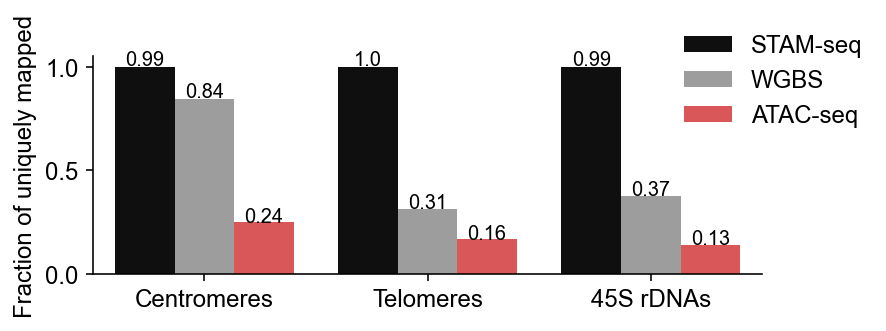

In [62]:
plt.figure(figsize=(6, 2))
ax = sns.barplot(x='region', y='ratio', hue='data_type', data=df, palette=['#0f0f0f', '#9d9d9d', '#ee4243'])
show_values(ax)

plt.legend(bbox_to_anchor=(.85, 1.2), loc=2, frameon=False)
plt.xticks(rotation=0, ha='center')
plt.ylabel('Fraction of uniquely mapped')
plt.xlabel('')

sns.despine()